In [2]:
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
path = "/content/drive/MyDrive/dataset/retail_sales.csv"
df = pd.read_csv(path)
df.head(8)  # Display the first 8 rows


Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  24/11/2023     CUST001    Male   34           Beauty   
1               2  27/02/2023     CUST002  Female   26         Clothing   
2               3  13/01/2023     CUST003    Male   50      Electronics   
3               4  21/05/2023     CUST004    Male   37         Clothing   
4               5  06/05/2023     CUST005    Male   30           Beauty   
5               6  25/04/2023     CUST006  Female   45           Beauty   
6               7  13/03/2023     CUST007    Male   46         Clothing   
7               8  22/02/2023     CUST008    Male   30      Electronics   

   Quantity Price per Unit Total Amount  
0         3            $50         $150  
1         2           $500        $1000  
2         1            $30          $30  
3         1           $500         $500  
4         2            $50         $100  
5         1            $30          $30  
6         2            $25          $50  
7         4            $25         $100

In [7]:
print(df.columns)


Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [8]:
# Strip any leading or trailing spaces
df.columns = df.columns.str.strip()


In [9]:
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)


In [11]:
print(revenue_by_category)
print(revenue_by_category.dtypes)


Product Category
Beautie                                                      $500
Beautyy                                                      $300
Electronics     $30$100$600$1500$2000$50$1000$30$100$30$1200$9...
Electronicss                                                  $30
Clothi                                                        $25
Beauty          $150$100$30$75$50$50$500$900$90$900$900$75$200...
Electronixc                                                 $1200
Clothing        $1000$500$50$200$100$120$1500$100$50$900$100$1...
Name: Total Amount, dtype: object
object


In [12]:
# Remove dollar signs and split concatenated values
df['Total Amount'] = df['Total Amount'].str.replace('$', '', regex=False)

# Expand concatenated values into lists, sum them up, and replace in the column
def clean_and_sum(amount):
    if isinstance(amount, str):
        # Split by numbers concatenated together
        numbers = amount.split('$') if '$' in amount else amount.split()
        # Convert to numeric and sum
        return sum(map(float, numbers))
    return amount  # Return unchanged if it's already clean

df['Total Amount'] = df['Total Amount'].apply(clean_and_sum)

# Ensure column is numeric
df['Total Amount'] = pd.to_numeric(df['Total Amount'], errors='coerce')

# Display cleaned column
print(df['Total Amount'].head())


0     150.0
1    1000.0
2      30.0
3     500.0
4     100.0
Name: Total Amount, dtype: float64


In [13]:
# Group by Product Category and calculate total revenue
revenue_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Display results
print("Total Revenue by Product Category:")
print(revenue_by_category)


Total Revenue by Product Category:
Product Category
Electronics     155675.0
Clothing        155555.0
Beauty          142715.0
Electronixc       1200.0
Beautie            500.0
Beautyy            300.0
Electronicss        30.0
Clothi              25.0
Name: Total Amount, dtype: float64


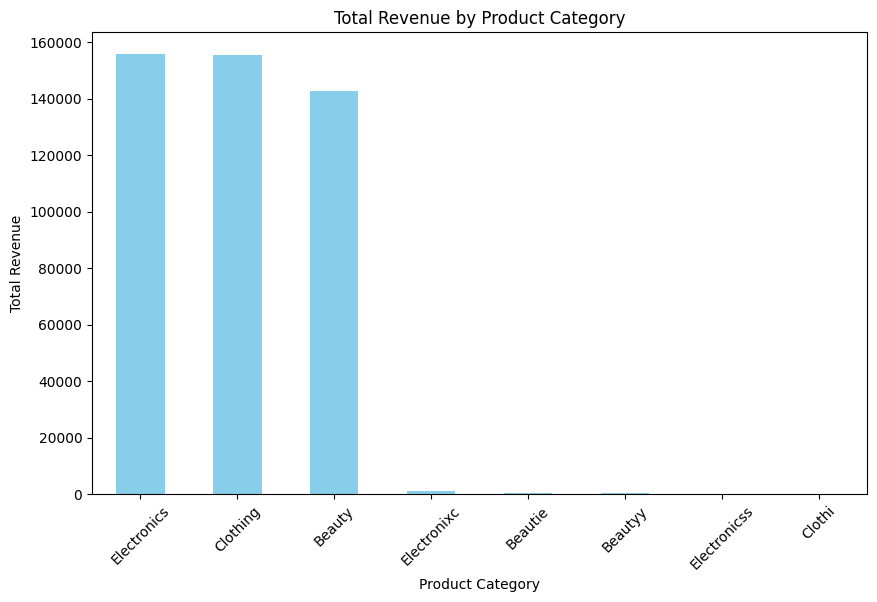

In [14]:
import matplotlib.pyplot as plt

# Create a bar chart
plt.figure(figsize=(10, 6))
revenue_by_category.plot(kind='bar', color='skyblue', title='Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


Total Revenue by Gender:
Gender
Female    232840.0
Male      223160.0
Name: Total Amount, dtype: float64


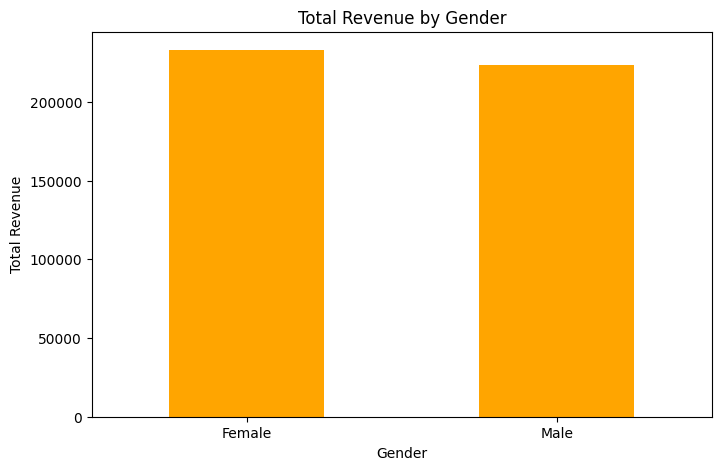

In [15]:
# Total revenue by gender
revenue_by_gender = df.groupby('Gender')['Total Amount'].sum().sort_values(ascending=False)

# Display results
print("Total Revenue by Gender:")
print(revenue_by_gender)

# Plot revenue by gender
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
revenue_by_gender.plot(kind='bar', color='orange', title='Total Revenue by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()


Average Transaction Amount by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


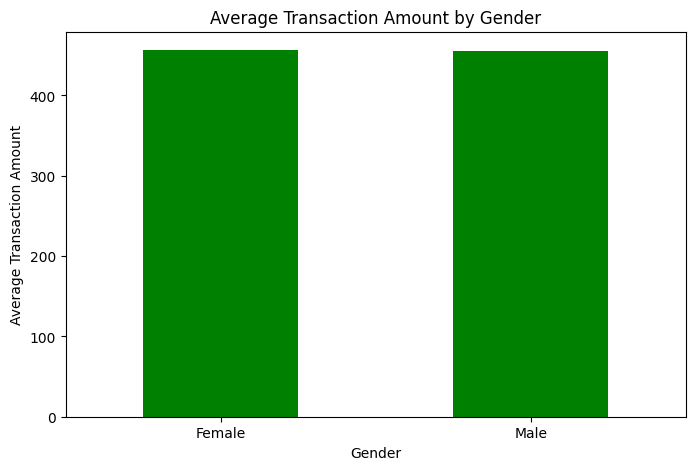

In [16]:
# Average transaction amount by gender
avg_transaction_by_gender = df.groupby('Gender')['Total Amount'].mean().sort_values(ascending=False)

# Display results
print("Average Transaction Amount by Gender:")
print(avg_transaction_by_gender)

# Plot average transaction amount by gender
plt.figure(figsize=(8, 5))
avg_transaction_by_gender.plot(kind='bar', color='green', title='Average Transaction Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=0)
plt.show()


<ipython-input-17-2960567d5bd9>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  revenue_by_age_group = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)


Total Revenue by Age Group:
Age Group
36-50       139660.0
51-65       133310.0
26-35        98480.0
18-25        73335.0
Under 18     11215.0
65+              0.0
Name: Total Amount, dtype: float64


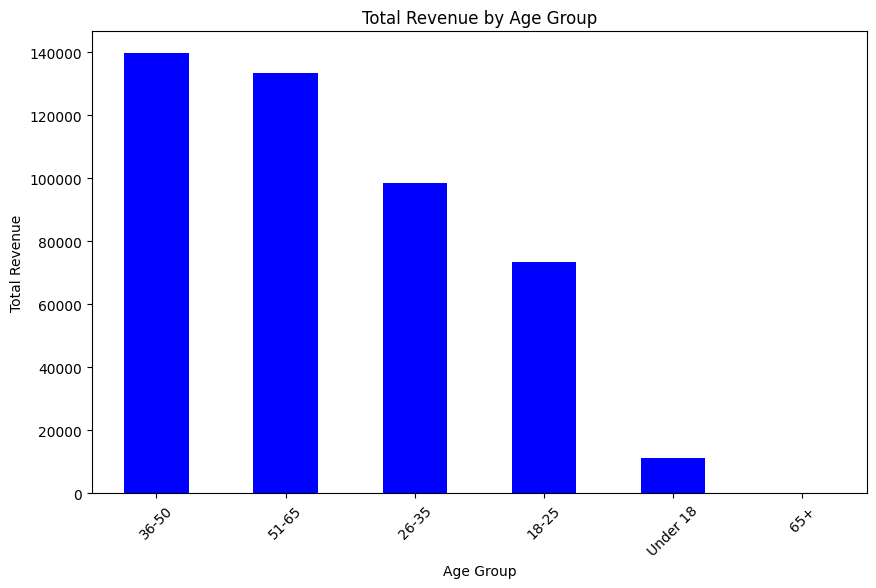

In [17]:
# Define age group bins
bins = [0, 18, 25, 35, 50, 65, 100]  # Define age ranges
labels = ['Under 18', '18-25', '26-35', '36-50', '51-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Total revenue by age group
revenue_by_age_group = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)

# Display results
print("Total Revenue by Age Group:")
print(revenue_by_age_group)

# Plot revenue by age group
plt.figure(figsize=(10, 6))
revenue_by_age_group.plot(kind='bar', color='blue', title='Total Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


<ipython-input-18-f4be6f063996>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_transaction_by_age_group = df.groupby('Age Group')['Total Amount'].mean().sort_values(ascending=False)


Average Transaction Amount by Age Group:
Age Group
Under 18    534.047619
18-25       495.506757
26-35       480.390244
36-50       446.198083
51-65       425.910543
65+                NaN
Name: Total Amount, dtype: float64


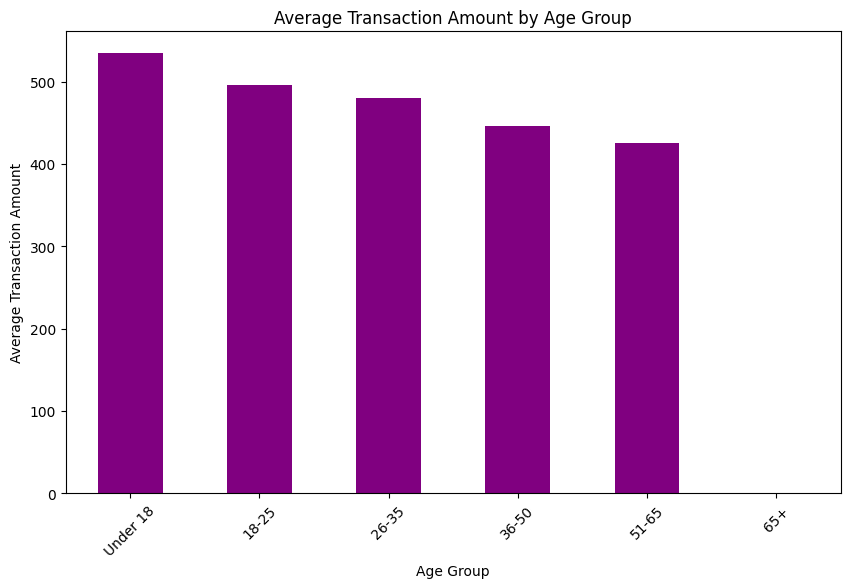

In [18]:
# Average transaction amount by age group
avg_transaction_by_age_group = df.groupby('Age Group')['Total Amount'].mean().sort_values(ascending=False)

# Display results
print("Average Transaction Amount by Age Group:")
print(avg_transaction_by_age_group)

# Plot average transaction amount by age group
plt.figure(figsize=(10, 6))
avg_transaction_by_age_group.plot(kind='bar', color='purple', title='Average Transaction Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract Month and Quarter for analysis
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter


<ipython-input-19-48f0f2f42802>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Total Revenue by Month:
Month
1     36980.0
2     44060.0
3     28990.0
4     33870.0
5     53150.0
6     36715.0
7     35465.0
8     36960.0
9     23620.0
10    46580.0
11    34920.0
12    44690.0
Name: Total Amount, dtype: float64


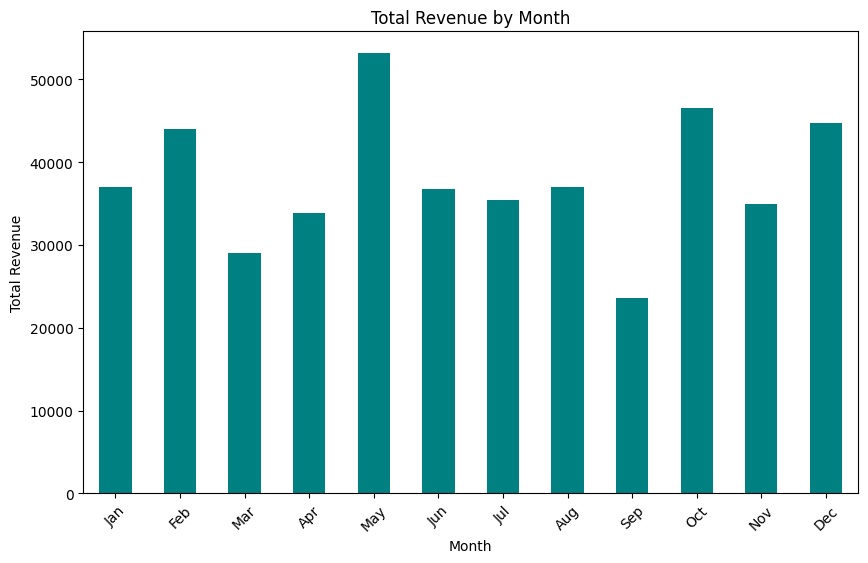

In [20]:
# Total revenue by month
revenue_by_month = df.groupby('Month')['Total Amount'].sum()

# Display results
print("Total Revenue by Month:")
print(revenue_by_month)

# Plot revenue by month
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
revenue_by_month.plot(kind='bar', color='teal', title='Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


Total Revenue by Quarter:
Quarter
1    110030.0
2    123735.0
3     96045.0
4    126190.0
Name: Total Amount, dtype: float64


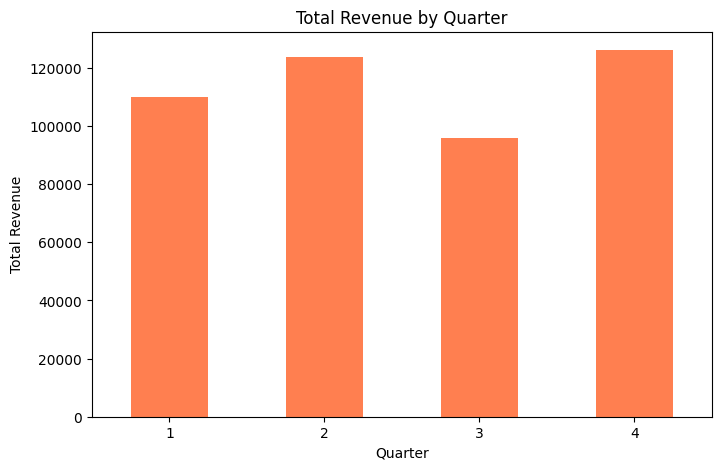

In [21]:
# Total revenue by quarter
revenue_by_quarter = df.groupby('Quarter')['Total Amount'].sum()

# Display results
print("Total Revenue by Quarter:")
print(revenue_by_quarter)

# Plot revenue by quarter
plt.figure(figsize=(8, 5))
revenue_by_quarter.plot(kind='bar', color='coral', title='Total Revenue by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()


In [22]:
# Aggregate revenue by date
revenue_by_date = df.groupby('Date')['Total Amount'].sum()

# Plot trend line
plt.figure(figsize=(12, 6))
revenue_by_date.plot(color='darkblue', title='Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()


In [23]:
# Calculate average transaction amount by customer
avg_transaction_by_customer = df.groupby('Customer ID')['Total Amount'].mean()

# Display the results
print("Average Transaction Amount by Customer:")
print(avg_transaction_by_customer.head(10))  # Display the first 10 customers


Average Transaction Amount by Customer:
Customer ID
CUST001     150.0
CUST002    1000.0
CUST003      30.0
CUST004     500.0
CUST005     100.0
CUST006      30.0
CUST007      50.0
CUST008     100.0
CUST009     600.0
CUST010     200.0
Name: Total Amount, dtype: float64


In [24]:
# Sort by average transaction amount in descending order
top_customers = avg_transaction_by_customer.sort_values(ascending=False)

# Display the top 10 customers
print("Top 10 Customers by Average Transaction Amount:")
print(top_customers.head(10))


Top 10 Customers by Average Transaction Amount:
Customer ID
CUST487    2000.0
CUST476    2000.0
CUST773    2000.0
CUST503    2000.0
CUST093    2000.0
CUST089    2000.0
CUST946    2000.0
CUST157    2000.0
CUST155    2000.0
CUST420    2000.0
Name: Total Amount, dtype: float64


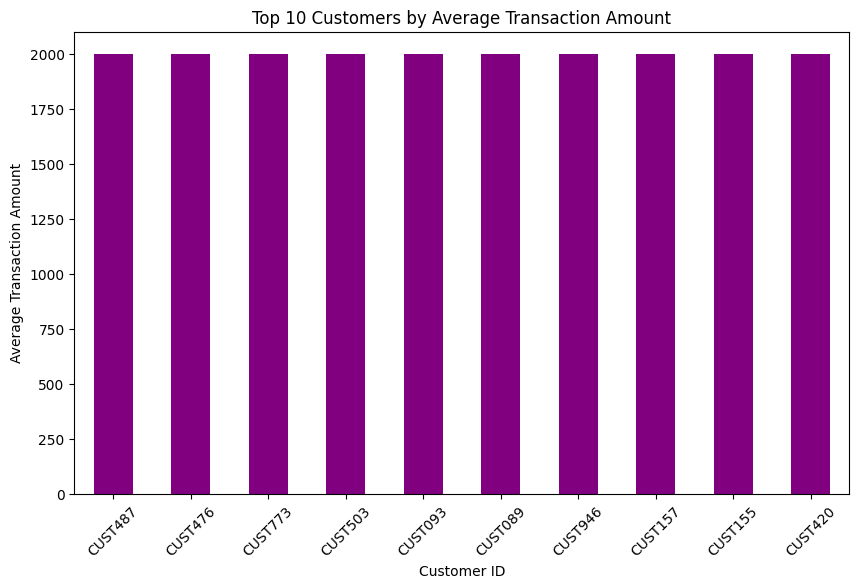

In [25]:
# Plot the top 10 customers by average transaction amount
top_customers.head(10).plot(kind='bar', figsize=(10, 6), color='purple', title='Top 10 Customers by Average Transaction Amount')
plt.xlabel('Customer ID')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=45)
plt.show()


In [27]:
# Count the number of transactions for each customer (this step was skipped earlier)
transaction_count_by_customer = df.groupby('Customer ID').size()


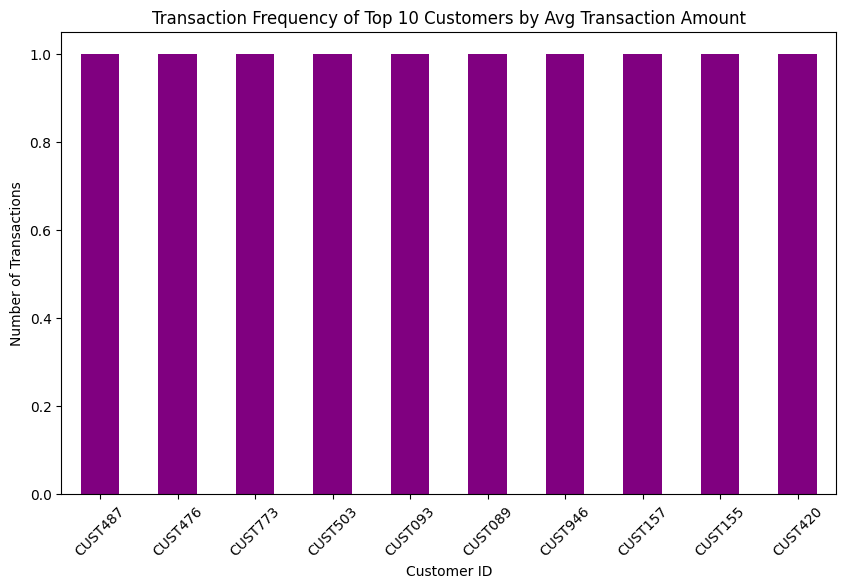

In [28]:
# Extract the top 10 customers by average transaction amount
top_10_customers_by_avg = avg_transaction_by_customer.sort_values(ascending=False).head(10)

# Get transaction frequency for the top 10 customers
top_10_customers_frequency = transaction_count_by_customer[top_10_customers_by_avg.index]

# Visualize the number of transactions for these top 10 customers
top_10_customers_frequency.plot(kind='bar', figsize=(10, 6), color='purple', title='Transaction Frequency of Top 10 Customers by Avg Transaction Amount')
plt.xlabel('Customer ID')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()
